**Architecture 1 - Two same inputs, one output**

A. Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

B. Data loading and preprocessing

In [2]:
housing = fetch_california_housing()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
X_train.shape[1:]

(8,)

C. Create a wide & deep neural network using Keras' Functional API

In [5]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [6]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss = "mean_squared_error")

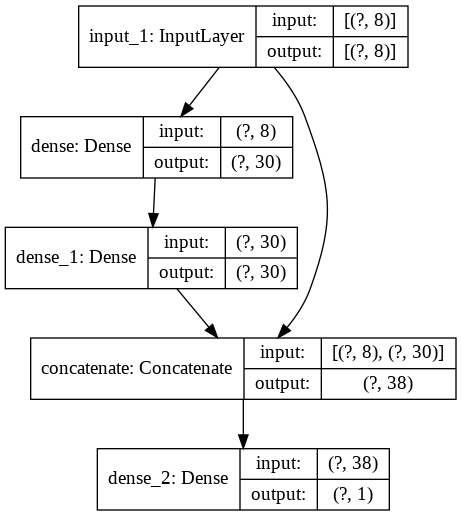

In [7]:
keras.utils.plot_model(model, show_shapes=True)

In [8]:
history = model.fit(X_train, y_train, epochs = 20, validation_split=0.1)

Epoch 1/20
465/465 [==============================] - 1s 1ms/step - loss: 1.7045 - val_loss: 0.7308
Epoch 2/20
465/465 [==============================] - 0s 1ms/step - loss: 0.7136 - val_loss: 0.6719
Epoch 3/20
465/465 [==============================] - 0s 1ms/step - loss: 0.6468 - val_loss: 0.6326
Epoch 4/20
465/465 [==============================] - 0s 1ms/step - loss: 0.6083 - val_loss: 0.6056
Epoch 5/20
465/465 [==============================] - 0s 922us/step - loss: 0.5787 - val_loss: 0.5825
Epoch 6/20
465/465 [==============================] - 0s 909us/step - loss: 0.5564 - val_loss: 0.5661
Epoch 7/20
465/465 [==============================] - 0s 925us/step - loss: 0.5385 - val_loss: 0.5523
Epoch 8/20
465/465 [==============================] - 0s 923us/step - loss: 0.5241 - val_loss: 0.5427
Epoch 9/20
465/465 [==============================] - 0s 948us/step - loss: 0.5124 - val_loss: 0.5360
Epoch 10/20
465/465 [==============================] - 0s 917us/step - loss: 0.5023 - val_

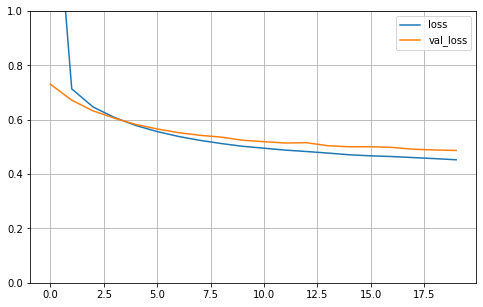

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.4828


0.48281198740005493

In [11]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[0.8677144],
       [1.678015 ],
       [2.9224138],
       [2.8364124],
       [2.6474922]], dtype=float32)

**Architecture 2 - Two different inputs, one output**

In [18]:
X_train_1, X_train_2 = X_train[:, :5], X_train[:,2:]
X_test_1, X_test_2 = X_test[:,:5], X_test[:,2:]

In [13]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden_1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)
concat = keras.layers.Concatenate()([input_A, hidden_2])
output_ = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output_])

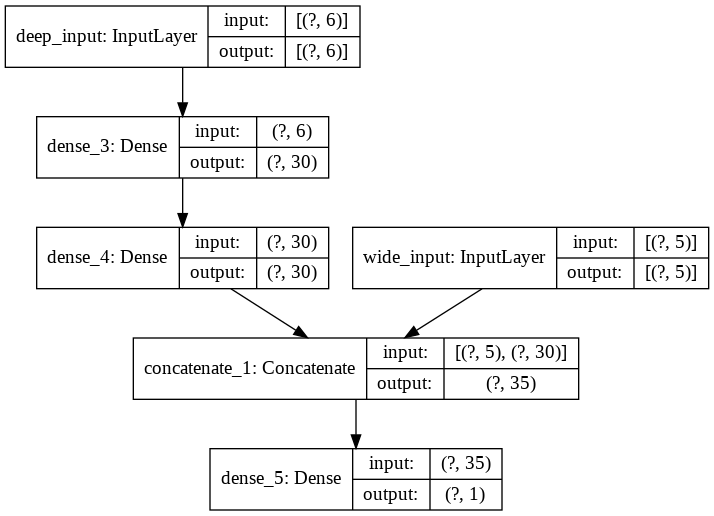

In [14]:
keras.utils.plot_model(model, show_shapes = True)

In [17]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss = keras.losses.mean_squared_error)

In [19]:
history2 = model.fit((X_train_1, X_train_2), y_train, epochs = 20, validation_split=0.1)

Epoch 1/20
465/465 [==============================] - 1s 1ms/step - loss: 2.1331 - val_loss: 0.9845
Epoch 2/20
465/465 [==============================] - 0s 1ms/step - loss: 0.8065 - val_loss: 0.7232
Epoch 3/20
465/465 [==============================] - 0s 1ms/step - loss: 0.6644 - val_loss: 0.6512
Epoch 4/20
465/465 [==============================] - 0s 990us/step - loss: 0.6134 - val_loss: 0.6121
Epoch 5/20
465/465 [==============================] - 0s 1ms/step - loss: 0.5795 - val_loss: 0.5823
Epoch 6/20
465/465 [==============================] - 0s 959us/step - loss: 0.5518 - val_loss: 0.5595
Epoch 7/20
465/465 [==============================] - 0s 1ms/step - loss: 0.5290 - val_loss: 0.5406
Epoch 8/20
465/465 [==============================] - 0s 1ms/step - loss: 0.5116 - val_loss: 0.5256
Epoch 9/20
465/465 [==============================] - 0s 989us/step - loss: 0.4989 - val_loss: 0.5164
Epoch 10/20
465/465 [==============================] - 0s 956us/step - loss: 0.4898 - val_loss

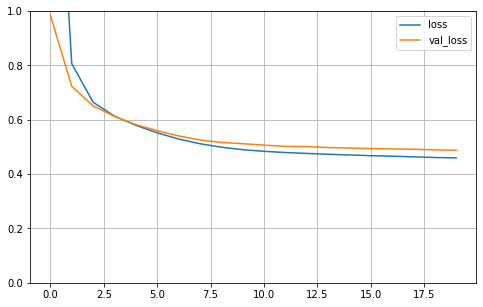

In [20]:
pd.DataFrame(history2.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
model.evaluate((X_test_1, X_test_2), y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.4732


0.47321227192878723

In [22]:
y_pred = model.predict((X_test_1, X_test_2))

In [23]:
y_pred[0:]

array([[0.40221816],
       [1.8194344 ],
       [2.9035873 ],
       ...,
       [4.4377174 ],
       [0.8826169 ],
       [1.927459  ]], dtype=float32)